In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
import pickle
import pandas as pd

data= pd.read_csv('/content/drive/MyDrive/ME683/Merged_dataset/merged_data_metal.csv')

In [ ]:
data

rho        E     mu  r   h        f1        f2        f3  \
0       6110.000  128.000  0.370  1   4  0.348127  0.559272  0.638251   
1       7310.000   50.000  0.360  1   4  0.891191  0.900242  0.913946   
2       6511.000   67.000  0.340  1   4  0.853137  0.872592  0.872599   
3       7010.000   41.000  0.280  1   4  0.921685  0.921699  0.921855   
4       8570.000  105.000  0.400  1   4  0.783142  0.784656  0.818507   
...          ...      ...    ... ..  ..       ...       ...       ...   
179547  5932.936   20.013  0.253  5  10  0.998923  0.998991  0.999065   
179548  9728.582   89.462  0.354  5  10  0.996476  0.996479  0.996710   
179549  9333.639   27.532  0.348  5  10  0.999052  0.999164  0.999248   
179550  7779.957   46.750  0.345  5  10  0.997514  0.997995  0.998805   
179551  6207.304  101.549  0.343  5  10  0.991753  0.992685  0.992688   

              f4        f5  ...       f21       f22       f23       f24  \
0       0.638253  0.691341  ...  1.206291  1.235776  1.235786  1.269619   
1       0.913960  0.915949  ...  1.041038  1.041144  1.041182  1.061618   
2       0.894212  0.894216  ...  1.018511  1.069492  1.069497  1.099565   
3       0.921876  0.945647  ...  1.045401  1.048186  1.053257  1.053271   
4       0.818516  0.914237  ...  1.085611  1.085717  1.087111  1.087123   
...          ...       ...  ...       ...       ...       ...       ...   
179547  0.999224  0.999226  ...  1.000398  1.000426  1.000517  1.000526   
179548  0.996832  0.997092  ...  1.001355  1.001520  1.001811  1.002259   
179549  0.999288  0.999403  ...  1.000390  1.000415  1.000434  1.000593   
179550  0.998816  0.999065  ...  1.000950  1.001700  1.001733  1.001787   
179551  0.995743  0.995953  ...  1.000250  1.000569  1.000618  1.001323   

             f25       f26       f27       f28       f29       f30  
0       1.269642  1.275225  1.275232  1.314984  1.361836       NaN  
1       1.061637  1.086306       NaN       NaN       NaN       NaN  
2       1.099605  1.108222  1.127754  1.127770  1.130671       NaN  
3       1.058687  1.058733  1.059723  1.059752  1.060328  1.060367  
4       1.088608  1.088717  1.153545  1.153553  1.178882       NaN  
...          ...       ...       ...       ...       ...       ...  
179547  1.000757  1.000854  1.000908  1.000934  1.000938  1.000944  
179548  1.002673  1.002673  1.003089  1.003194  1.003271  1.003319  
179549  1.000686  1.000754  1.000780  1.000886  1.000917  1.000970  
179550  1.002124  1.002185  1.002239  1.002529  1.002651  1.002740  
179551  1.001461  1.001760  1.006367  1.007153  1.007869  1.007955  

[179552 rows x 35 columns]

In [ ]:
X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'mu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
xgb_model = XGBRegressor(n_estimators=100000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 168.03644456063535
Mean Squared Error for mu: 0.0005942960094825624


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 7.342823556352033
Mean Absolute Error for mu: 0.01917539598986938
Standard Deviation for E: 10.685642846406674
Standard Deviation for mu: 0.015057437955341257
Mean Absolute percentage Error for E: 11.0696399686601
Mean Absolute percentage Error for mu: 6.400102483523216
Mode Percentage Error for E: ModeResult(mode=1.0, count=177) 
Mode Percentage Error for E: ModeResult(mode=0.3, count=27) 
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      113.516   111.892990   1.623010      0.350      0.301740  0.048260   
1      101.324   112.137833  10.813833      0.359      0.291422  0.067578   
2       29.021    27.155783   1.865217      0.343      0.334122  0.008878   
3       36.010    33.647171   2.362829      0.279      0.298462  0.019462   
4       20.628    24.066475   3.438475      0.257      0.286815  0.029815   
...        ...          ...        ...        ...           ...       ...   
1791   115.100   101.639732  13.460268  

Median Percentage Error for E: 6.480251745207826
Median Percentage Error for mu: 5.0420064181466895
Mean Absolute Error for E: 7.342823556352033
Mean Absolute Error for mu: 0.01917539598986938
Standard Deviation for E: 10.685642846406674
Standard Deviation for mu: 0.015057437955341257


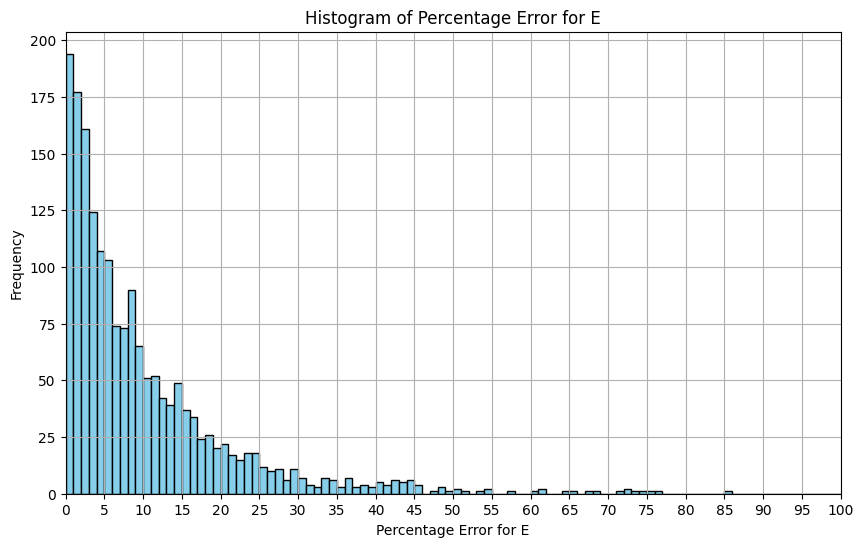

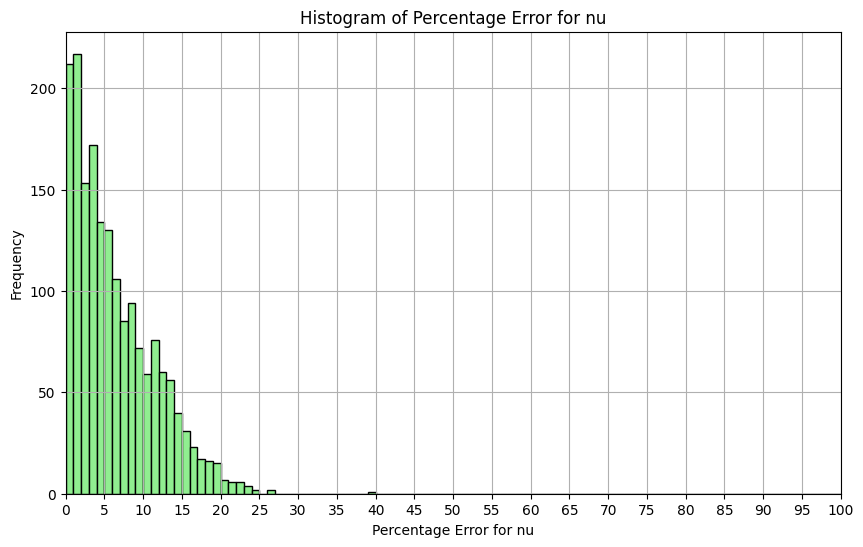

Maximum Percentage Error for E: 388.0704014486027
Minimum Percentage Error for E: 0.0023980867151827847
Maximum Percentage Error for mu: 39.965173744020014
Minimum Percentage Error for mu: 0.0028848648071296227


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'metal_xgb_no_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('metal_xgb_no_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Scaled**

---



In [ ]:


# Assuming dataf is your DataFrame
data['E'] *= 10
data['mu'] *= 10000
X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'mu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
Y

E      mu
0       1280.00  3700.0
1        500.00  3600.0
2        670.00  3400.0
3        410.00  2800.0
4       1050.00  4000.0
...         ...     ...
179547   200.13  2530.0
179548   894.62  3540.0
179549   275.32  3480.0
179550   467.50  3450.0
179551  1015.49  3430.0

[179552 rows x 2 columns]

In [ ]:
xgb_model = XGBRegressor(n_estimators=80000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 17282.293440192647
Mean Squared Error for mu: 60698.10196465639


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
results_df['Actual_E'] /= 10
results_df['Predicted_E'] /= 10
results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 7.492191168906163
Mean Absolute Error for mu: 0.019577746935464227
Standard Deviation for E: 10.805323421828637
Standard Deviation for mu: 0.014960530222776493
Mean Absolute percentage Error for E: 11.206525773182655
Mean Absolute percentage Error for mu: 6.532515703869409
Mode Percentage Error for E: ModeResult(mode=1.0, count=198) 
Mode Percentage Error for E: ModeResult(mode=2.0, count=28) 
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      113.516   114.357704   0.841703      0.350      0.304061  0.045939   
1      101.324   110.587852   9.263854      0.359      0.297405  0.061595   
2       29.021    27.227713   1.793287      0.343      0.330675  0.012325   
3       36.010    33.022369   2.987631      0.279      0.296765  0.017765   
4       20.628    24.823498   4.195499      0.257      0.290312  0.033312   
...        ...          ...        ...        ...           ...       ...   
1791   115.100   100.255486  14.84451

Median Percentage Error for E: 6.324386385954389
Median Percentage Error for mu: 5.244880075523351
Mean Absolute Error for E: 7.492191168906163
Mean Absolute Error for mu: 0.019577746935464227
Standard Deviation for E: 10.805323421828637
Standard Deviation for mu: 0.014960530222776493


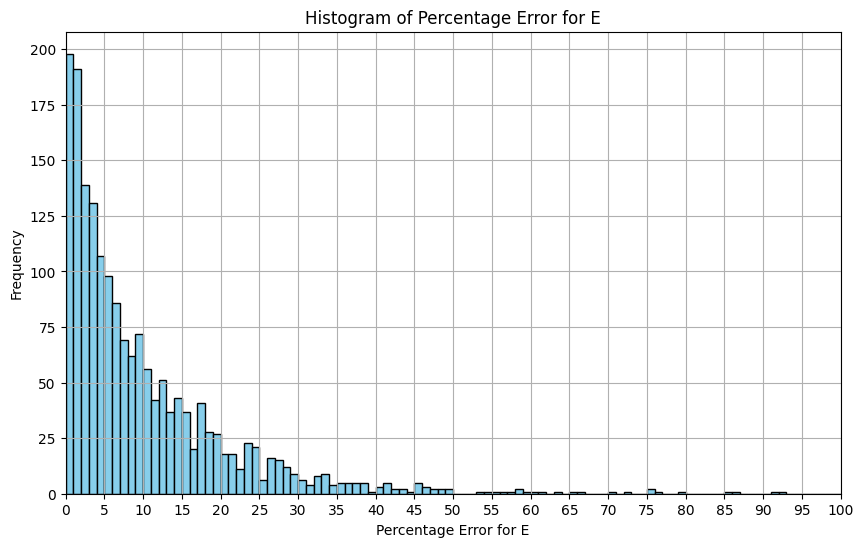

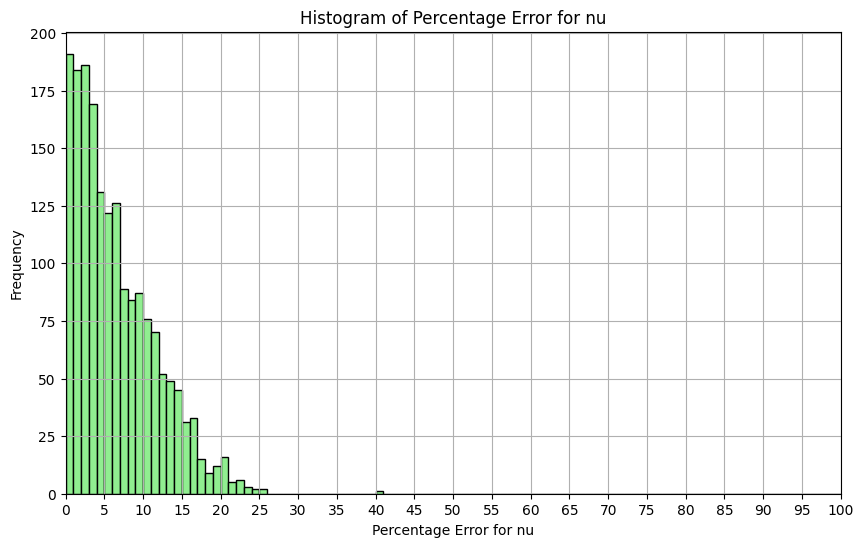

Maximum Percentage Error for E: 385.5822762143619
Minimum Percentage Error for E: 0.0015551341659824599
Maximum Percentage Error for mu: 40.962716238839285
Minimum Percentage Error for mu: 0.0031389508928571434


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'metal_xgb_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('metal_xgb_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **only nu scaled**

In [ ]:
# X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# Y = data[['E', 'mu']]

# # Assuming dataf is your DataFrame
data['E'] /= 10
# data['mu'] *= 10000
X = data[['rho','r','h', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
Y = data[['E', 'mu']]
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)

In [ ]:
data

rho        E      mu  r   h        f1        f2        f3  \
0       6110.000  128.000  3700.0  1   4  0.348127  0.559272  0.638251   
1       7310.000   50.000  3600.0  1   4  0.891191  0.900242  0.913946   
2       6511.000   67.000  3400.0  1   4  0.853137  0.872592  0.872599   
3       7010.000   41.000  2800.0  1   4  0.921685  0.921699  0.921855   
4       8570.000  105.000  4000.0  1   4  0.783142  0.784656  0.818507   
...          ...      ...     ... ..  ..       ...       ...       ...   
179547  5932.936   20.013  2530.0  5  10  0.998923  0.998991  0.999065   
179548  9728.582   89.462  3540.0  5  10  0.996476  0.996479  0.996710   
179549  9333.639   27.532  3480.0  5  10  0.999052  0.999164  0.999248   
179550  7779.957   46.750  3450.0  5  10  0.997514  0.997995  0.998805   
179551  6207.304  101.549  3430.0  5  10  0.991753  0.992685  0.992688   

              f4        f5  ...       f21       f22       f23       f24  \
0       0.638253  0.691341  ...  1.206291  1.235776  1.235786  1.269619   
1       0.913960  0.915949  ...  1.041038  1.041144  1.041182  1.061618   
2       0.894212  0.894216  ...  1.018511  1.069492  1.069497  1.099565   
3       0.921876  0.945647  ...  1.045401  1.048186  1.053257  1.053271   
4       0.818516  0.914237  ...  1.085611  1.085717  1.087111  1.087123   
...          ...       ...  ...       ...       ...       ...       ...   
179547  0.999224  0.999226  ...  1.000398  1.000426  1.000517  1.000526   
179548  0.996832  0.997092  ...  1.001355  1.001520  1.001811  1.002259   
179549  0.999288  0.999403  ...  1.000390  1.000415  1.000434  1.000593   
179550  0.998816  0.999065  ...  1.000950  1.001700  1.001733  1.001787   
179551  0.995743  0.995953  ...  1.000250  1.000569  1.000618  1.001323   

             f25       f26       f27       f28       f29       f30  
0       1.269642  1.275225  1.275232  1.314984  1.361836       NaN  
1       1.061637  1.086306       NaN       NaN       NaN       NaN  
2       1.099605  1.108222  1.127754  1.127770  1.130671       NaN  
3       1.058687  1.058733  1.059723  1.059752  1.060328  1.060367  
4       1.088608  1.088717  1.153545  1.153553  1.178882       NaN  
...          ...       ...       ...       ...       ...       ...  
179547  1.000757  1.000854  1.000908  1.000934  1.000938  1.000944  
179548  1.002673  1.002673  1.003089  1.003194  1.003271  1.003319  
179549  1.000686  1.000754  1.000780  1.000886  1.000917  1.000970  
179550  1.002124  1.002185  1.002239  1.002529  1.002651  1.002740  
179551  1.001461  1.001760  1.006367  1.007153  1.007869  1.007955  

[179552 rows x 35 columns]

In [ ]:
y_test

array([[ 113.516, 3500.   ],
       [ 101.324, 3590.   ],
       [  29.021, 3430.   ],
       ...,
       [  61.255, 3540.   ],
       [  58.822, 2890.   ],
       [ 102.916, 2630.   ]])

In [ ]:
xgb_model = XGBRegressor(n_estimators=80000, random_state=42, learning_rate=0.003)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

Mean Squared Error for E: 173.49785742119192
Mean Squared Error for mu: 61044.4141391518


In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
results_df['Actual_mu'] /= 10000
results_df['Predicted_mu'] /= 10000
results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')

import numpy as np
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
from scipy import stats
results_df['Percentage_Error_E_Rounded'] = results_df['Percentage_Error_E'].round(0)
results_df['Percentage_Error_mu_Rounded'] = results_df['Percentage_Error_mu'].round(1)
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E_Rounded'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu_Rounded'])
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(results_df)

Mean Absolute Error for E: 7.488360028579134
Mean Absolute Error for mu: 0.019605850960576456
Standard Deviation for E: 10.839176068256744
Standard Deviation for mu: 0.015039304681293494
Mean Absolute percentage Error for E: 11.194830940474851
Mean Absolute percentage Error for mu: 6.551050512355563
Mode Percentage Error for E: ModeResult(mode=1.0, count=184) 
Mode Percentage Error for E: ModeResult(mode=0.5, count=27) 
      Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      113.516   116.624382   3.108382      0.350      0.304396  0.045604   
1      101.324   112.973442  11.649442      0.359      0.301456  0.057544   
2       29.021    27.140242   1.880758      0.343      0.330513  0.012487   
3       36.010    37.129257   1.119257      0.279      0.304536  0.025536   
4       20.628    23.769384   3.141384      0.257      0.289442  0.032442   
...        ...          ...        ...        ...           ...       ...   
1791   115.100    98.732300  16.36770

Median Percentage Error for E: 6.681411664305768
Median Percentage Error for mu: 5.194705568337487
Mean Absolute Error for E: 7.488360028579134
Mean Absolute Error for mu: 0.019605850960576456
Standard Deviation for E: 10.839176068256744
Standard Deviation for mu: 0.015039304681293494


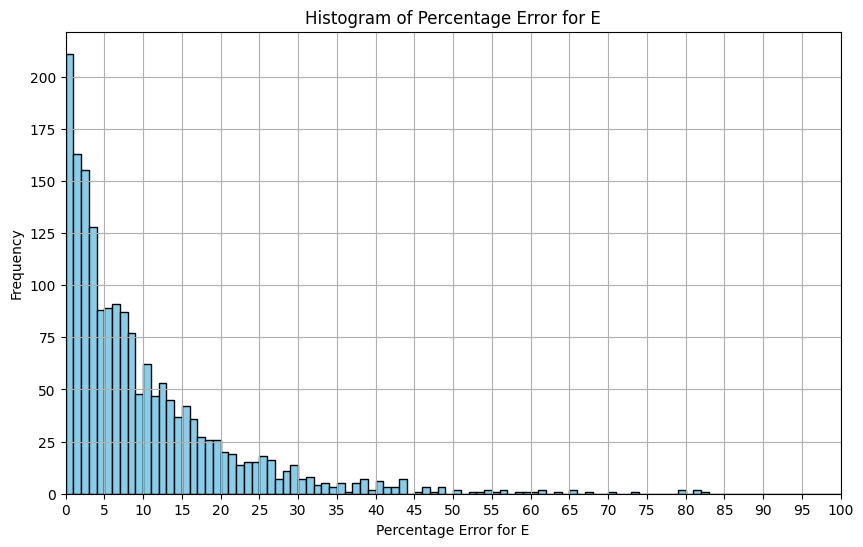

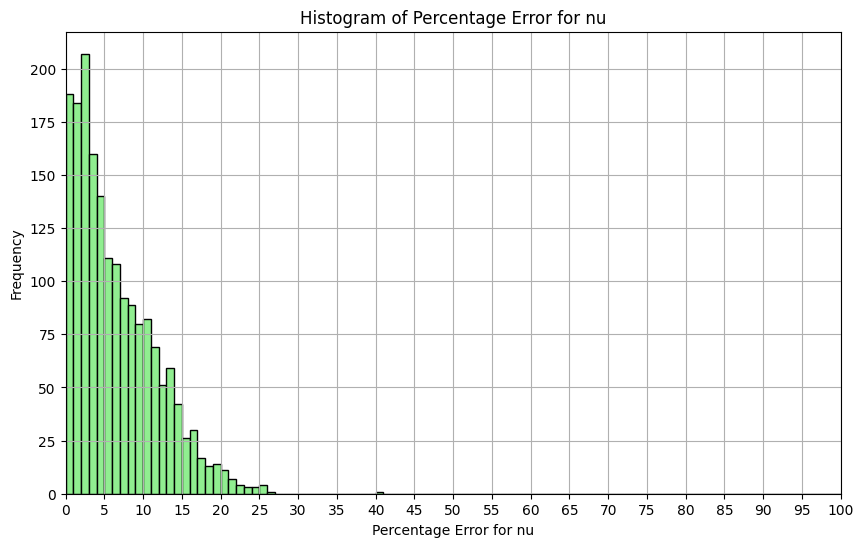

Maximum Percentage Error for E: 385.94703250747176
Minimum Percentage Error for E: 0.015124118145623262
Maximum Percentage Error for mu: 40.952334449404766
Minimum Percentage Error for mu: 0.003938494988207547


In [ ]:
import matplotlib.pyplot as plt

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
results_df.to_csv('prediction_results_ceramic_xgb.csv', index=False)
# from google.colab import files

# # Path to the file you want to download
# file_path = 'prediction_results_ceramic_xgb.csv'

# # Trigger the download
# files.download(file_path)

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for nu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for nu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()
# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import joblib

# Assuming model is your trained machine learning model
# Replace 'model.pkl' with the desired filename
joblib.dump(xgb_model, 'metal_xgb_nu_scale_merge.pkl')
from google.colab import files

# Download the model file
files.download('metal_xgb_nu_scale_merge.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>